In [123]:
from langgraph.graph import StateGraph,START,END
from IPython.display import Image
from typing import TypedDict

In [ ]:
from langchain_groq import ChatGroq
import os
api_key = os.getenv("GROQ_API_KEY")
llm = ChatGroq(model='llama-3.1-8b-instant', api_key=api_key)

In [125]:
class Cricket(TypedDict):
    four:int
    six:int
    run:int
    ball:int

    sr:float
    brb:float
    boundary: float
    summary: str

In [126]:
def calculate_sr(state : Cricket) ->Cricket:
    sr_float =  float(state['run'] / state['ball'])
    
    return {'sr' :sr_float}



In [127]:
def calculate_brb(state : Cricket) ->Cricket:
    brb_float = float(state['ball']/(state['four'] + state['six']))
    print("brb value is ",brb_float)
    # state['brb'] = brb_float
    return {'brb' :brb_float}
    

In [128]:
def calculate_percent_boundary(state : Cricket) -> Cricket:
    boundary_val = (state['four']  + state['six'] )/ state['run']
    # state['boundary'] = boundary_val
    return {'boundary' : boundary_val}


In [129]:
def summary(state : Cricket) -> Cricket:
    
    print("state is ",state)
    summary_val = f"the summary for the match is \n brb  is {state['brb']} \n boundary percent is {state['boundary']} \n sr is {state['sr']} "
    
    return {'summary': summary_val}

In [130]:
graph = StateGraph(Cricket)

graph.add_node('calculate_brb_node',calculate_brb)
graph.add_node('calculate_sr_node',calculate_sr)
graph.add_node('calculate_percent_boundary_node',calculate_percent_boundary)
graph.add_node('summary_node',summary)

graph.add_edge(START,'calculate_brb_node')
graph.add_edge(START,'calculate_percent_boundary_node')
graph.add_edge(START,'calculate_sr_node')



graph.add_edge('calculate_brb_node','summary_node')
graph.add_edge('calculate_percent_boundary_node','summary_node')
graph.add_edge('calculate_sr_node','summary_node')


graph.add_edge('summary_node',END)

In [131]:
#compile the graph
workflow  = graph.compile()



In [132]:
initial_state={'four':20,'six':15,'run':400,'ball':55}

In [133]:
final_state = workflow.invoke(initial_state)

brb value is  1.5714285714285714
state is  {'four': 20, 'six': 15, 'run': 400, 'ball': 55, 'sr': 7.2727272727272725, 'brb': 1.5714285714285714, 'boundary': 0.0875}


In [134]:
final_state['summary']

'the summary for the match is \n brb  is 1.5714285714285714 \n boundary percent is 0.0875 \n sr is 7.2727272727272725 '

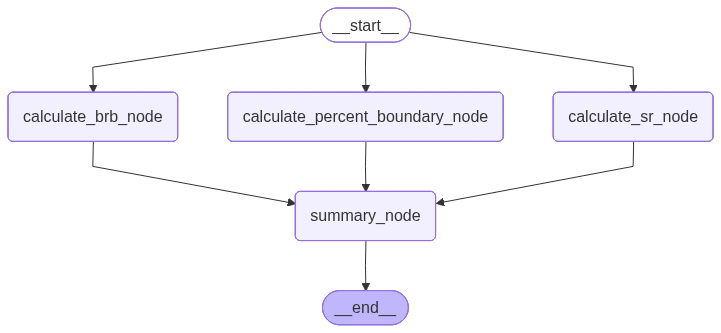

In [135]:
Image(workflow.get_graph().draw_mermaid_png())